In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.0 MB/s eta 0:00:00


In [85]:
from datasets import load_dataset
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import string
import numpy as np
from wordcloud import WordCloud
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
dataset = load_dataset("wmt16",'de-en')

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2169 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2999 [00:00<?, ? examples/s]

Dataset wmt16 downloaded and prepared to /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
#saving the three splits of the dataset
train_data = dataset['train']
val_data = dataset['validation']
test_data = dataset['test']

# Visualise the dataset using five different techniques to show how the 2 languages differ.

1.   Sequence Length Distribution
2.   Word Frequency Distribution
3.   Mean Token Length
4.   Word Cloud
5.   Part of Speech Tag Distribution

In [19]:
def preprocessing(sentence):
  sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)
  # sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence)
  sentence = sentence.strip()
  if(len(sentence.split(' ')) >15):
    return "!"
  return sentence

In [20]:
preprocessing(train_data[0]['translation']['en'])

'Resumption of the session'

In [28]:
#storing text of english part of the dataset in a list
train_data_english = list()
train_data_german = list()

for i in tqdm((range(0,len(train_data)))):
  sent1 = preprocessing(train_data[i]['translation']['en'])
  sent2 = preprocessing(train_data[i]['translation']['de'])
  if(sent1!='!' and sent2!='!'):
    train_data_english.append(sent1)
    train_data_german.append(sent2)

100%|██████████| 4548885/4548885 [19:32<00:00, 3881.09it/s]


In [63]:
for i in (re.sub(r"([?.!,¿])", r" \1 ", 'hello.')).split(' '):
  if i not in string.punctuation:
    print(i)

hello


In [38]:
#storing the sequence length of each utter
sequence_length_english = []
sequence_length_german = []
for i in range(0,len(train_data_english)):
    sequence_length_english.append(len(train_data_english[i]))
    sequence_length_german.append(len(train_data_german[i]))

## 1. Sequence Length Distribution

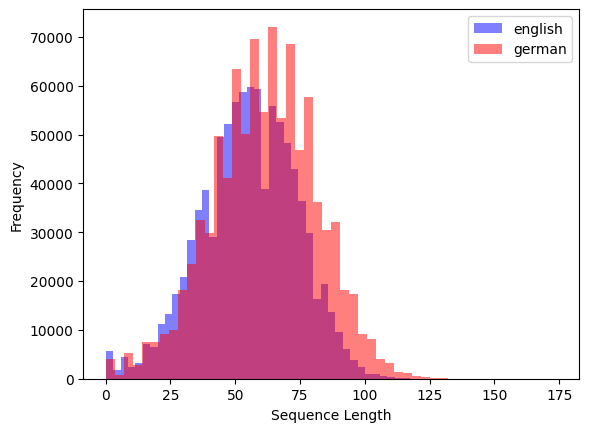

In [39]:
plt.hist(sequence_length_english,bins = 50,alpha = 0.5, label = "english",color = 'blue')
plt.hist(sequence_length_german,bins = 50, alpha = 0.5, label = "german", color = "red")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [64]:
german_tokens = []
for i in tqdm(train_data_german):
    german_tokens.extend(i.split(" "))

100%|██████████| 940525/940525 [00:02<00:00, 353088.44it/s]


In [65]:
english_tokens = []
for i in tqdm(train_data_english):
    english_tokens.extend(i.split(" "))

100%|██████████| 940525/940525 [00:02<00:00, 452868.13it/s]


In [73]:
german_clean_tokens = []
for i in tqdm(german_tokens):
    if i not in string.punctuation:
        german_clean_tokens.append(i.lower())

english_clean_tokens = []
for i in tqdm(english_tokens):
    if i not in string.punctuation:
        english_clean_tokens.append(i.lower())

100%|██████████| 9891183/9891183 [00:07<00:00, 1268866.16it/s]


In [74]:
english_freq = nltk.FreqDist(english_clean_tokens)
german_freq = nltk.FreqDist(german_clean_tokens)

## 2. Word Frequency Distribution


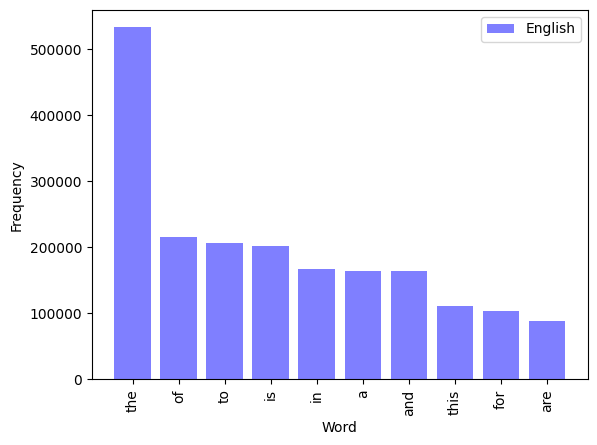

In [75]:
plt.bar(range(10), [english_freq[1] for english_freq in english_freq.most_common(10)], tick_label = [english_freq[0] for english_freq in english_freq.most_common(10)], alpha = 0.5, label = 'English',color = 'blue')
# plt.bar(range(10), [german_freq[1] for german_freq in german_freq.most_common(10)], tick_label =[german_freq[0] for german_freq in german_freq.most_common(10)], alpha = 0.5, label = 'German', color = 'red' )
plt.xticks(rotation = 90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.legend()
plt.show()

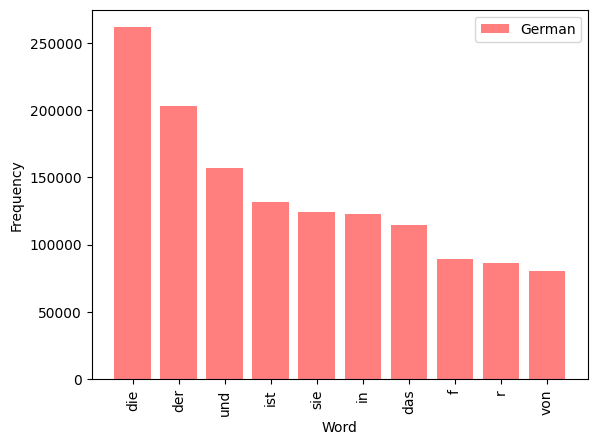

In [76]:
plt.bar(range(10), [german_freq[1] for german_freq in german_freq.most_common(10)], tick_label =[german_freq[0] for german_freq in german_freq.most_common(10)], alpha = 0.5, label = 'German', color = 'red' )
plt.xticks(rotation = 90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [79]:
german_token_mean = np.mean([len(word) for word in german_clean_tokens])
english_token_mean = np.mean([len(word) for word in english_clean_tokens])

## 3. Mean Token Length

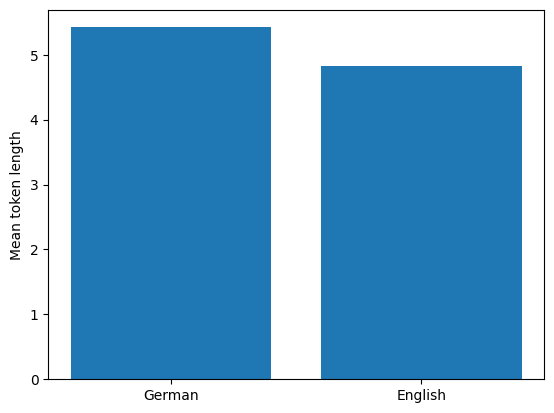

In [80]:
plt.bar(['German', 'English'],[german_token_mean, english_token_mean])
plt.ylabel("Mean token length")
plt.show()

## 4. Word Cloud

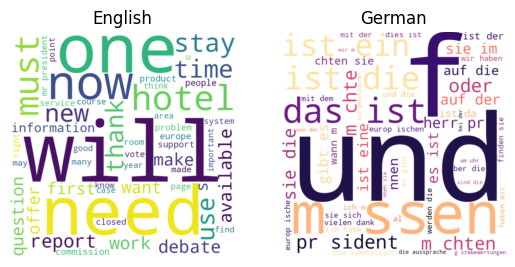

In [83]:
german_text = ' '.join([token for token in german_clean_tokens])
english_text = ' '.join([token for token in english_clean_tokens])
german_word_cloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words= 50, colormap = 'magma').generate(german_text)
english_word_cloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 50, colormap = 'viridis').generate(english_text)


plt.subplot(1,2,1)
plt.imshow(english_word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('English')
plt.subplot(1,2,2)
plt.imshow(german_word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('German')
plt.show()

## 5. Part of Speech Tag Distribution

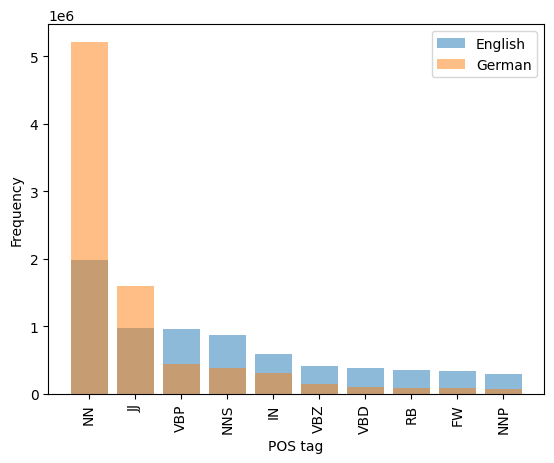

In [93]:
german_pos_tags = nltk.pos_tag(german_clean_tokens)
english_pos_tags = nltk.pos_tag(english_clean_tokens)

german_pos_freq = nltk.FreqDist(tag for (word,tag) in german_pos_tags)
english_pos_freq = nltk.FreqDist(tag for (word,tag) in english_pos_tags)

plt.bar(range(10), [freq[1] for freq in english_pos_freq.most_common(10)], tick_label=[freq[0] for freq in english_pos_freq.most_common(10)], alpha=0.5, label='English')
plt.bar(range(10), [freq[1] for freq in german_pos_freq.most_common(10)], tick_label=[freq[0] for freq in german_pos_freq.most_common(10)], alpha=0.5, label='German')
plt.xticks(rotation=90)
plt.xlabel('POS tag')
plt.ylabel('Frequency')
plt.legend()
plt.show()